In [ ]:
#installation
!pip install datasets pandas matplotlib seaborn openpyxl

In [ ]:
#import
from datasets import load_dataset
import pandas as pd

#dataset loading
pr_request = load_dataset("hao-li/AIDev", name="pull_request", split="train")

#dataframe
df= pr_request.to_pandas()

print("Loaded Data:")
# print(df.head())
print("\nColumns:", df.columns)


Loaded Data:

Columns: Index(['id', 'number', 'title', 'body', 'agent', 'user_id', 'user', 'state',
       'created_at', 'closed_at', 'merged_at', 'repo_id', 'repo_url',
       'html_url'],
      dtype='object')


In [ ]:
#Detecting tests
test_keywords = ["test", "unit test", "integration test", "pytest", "junit", "assert","performance test","benchmark test"]

def is_test_pr(text):
    if pd.isna(text):
        return False
    text = text.lower()
    return any(keyword in text for keyword in test_keywords)
# Apply to title and body
df["is_test_related"] = df["title"].apply(is_test_pr) | df["body"].apply(is_test_pr)

#Compututing metrices 
metrics = df.groupby("agent").agg(
    total_prs = ("id", "count"),
    test_prs  = ("is_test_related", "sum")
).reset_index()

metrics["test_pr_percentage"] = metrics["test_prs"] / metrics["total_prs"] * 100

print("\nTest-related PR metrics by Agentic AI:")
display(metrics)

# Save metrics to Excel
metrics.to_excel("agentic_ai_test_metrics.xlsx", index=False)
print("Saved: agentic_ai_test_metrics.xlsx")



Test-related PR metrics by Agentic AI:


,agent,total_prs,test_prs,test_pr_percentage
0,Claude_Code,459,355,77.342048
1,Copilot,4970,3565,71.730382
2,Cursor,1541,509,33.030500
3,Devin,4827,3375,69.919204
4,OpenAI_Codex,21799,20980,96.242947


Saved: agentic_ai_test_metrics.xlsx


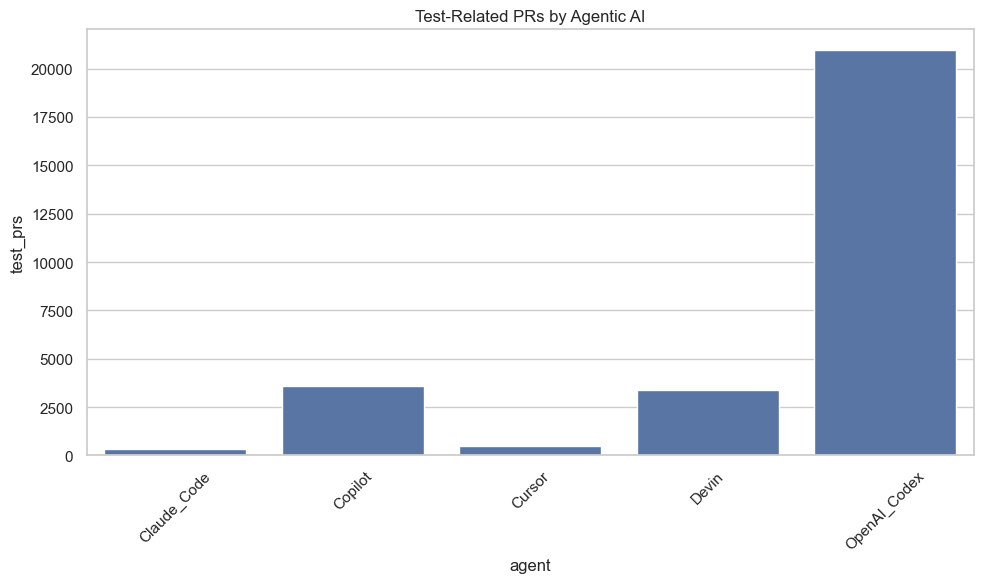

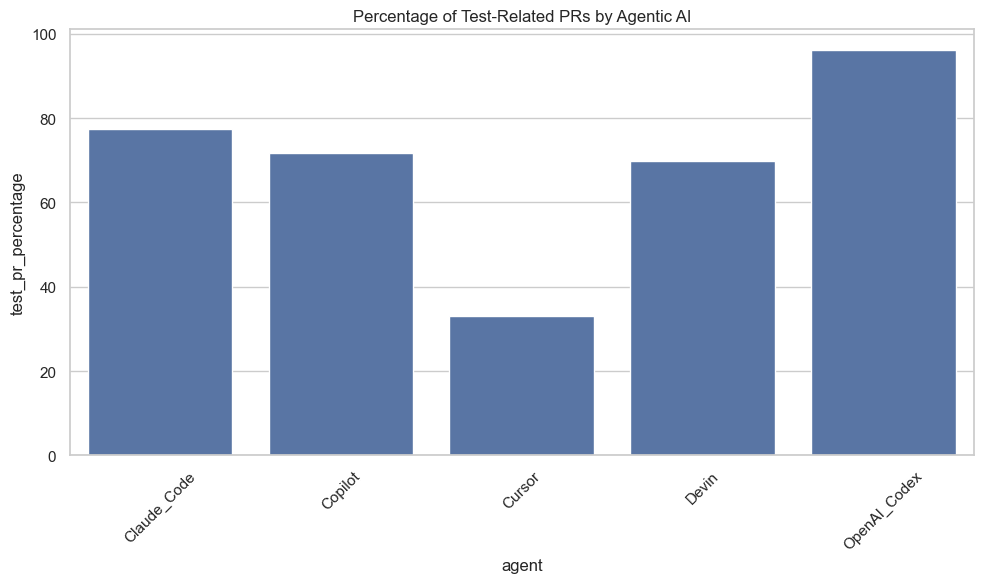

All plots saved as PNG.


In [ ]:
#import
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Bar plot: Number of test-related PRs
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics, x="agent", y="test_prs")
plt.xticks(rotation=45)
plt.title("Test-Related PRs by Agentic AI")
plt.tight_layout()
plt.savefig("test_related_prs_count.png")
plt.show()

# Bar plot: Percentage of test-related PRs
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics, x="agent", y="test_pr_percentage")
plt.xticks(rotation=45)
plt.title("Percentage of Test-Related PRs by Agentic AI")
plt.tight_layout()
plt.savefig("test_related_prs_percentage.png")
plt.show()

print("All plots saved as PNG.")